In [1]:
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings, get_benchmark
from qiskit import *
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import *
from qiskit.providers.fake_provider import *
import numpy as np 
import os, time, csv
import pandas as pd

In [2]:
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()

In [3]:
all_algo = ["ae","dj","ghz","graphstate","qaoa","portfolioqaoa","qft","vqe","portfoliovqe","qftentangled","qpeexact","qpeinexact","random","realamprandom","twolocalrandom","qwalk-noancilla","wstate","grover-v-chain","qwalk-v-chain","grover-noancilla","qnn","pricingcall","pricingput","routing","tsp"]
#all_algo = ["ae","dj","ghz","graphstate"]

In [ ]:
records = []
csv_file = "benchmark_results_all_mqt_alogs_3_to_12.csv"

compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level=1))
for i in all_algo:  
    print(i)
    for n in range(3, 12, 2):    
        print(n)
        s=time.time()
        qc = get_benchmark(benchmark_name=i,
                           level="nativegates",
                           circuit_size=n,
                           compiler="qiskit",
                           compiler_settings=compiler_settings,
                           provider_name="ionq",)
        e=time.time()
        algo=e-s
        print("Loading the algorithm is taking time", algo)
        print("---------------",i,n,"---------------")
        #print(qc_native_gates_level.draw())
        print("drawing done")

        start =time.time()
        job = sampler.run([qc], shots=1000)
        end =time.time()
        result = job.result()
        print("job done")
        
        #counts = result[0].data["meas"].get_counts()
        #print(f" > Counts: {result[0].data["meas"].get_counts()}")
        
        print("Algorithm: ",i,"with",n,"qubit","is taking =",end-start, "seconds for execution.")
        records.append([i, n, end-start])
        file_is_empty = (not os.path.exists(csv_file)) or (os.path.getsize(csv_file) == 0)

        with open(csv_file, "a", newline="") as f:
            writer = csv.writer(f)
            if file_is_empty:
                writer.writerow(["Algorithm", "QubitNumber", "ExecutionTime", "LoadingTime"])
            writer.writerow([i, n, end-start,algo,])
        print("writing done")
print("CSV updated:", csv_file)

ae
3
Loading the algorithm is taking time 10.553134679794312
--------------- ae 3 ---------------
drawing done
job done
Algorithm:  ae with 3 qubit is taking = 0.0054209232330322266 seconds for execution.
writing done
5
Loading the algorithm is taking time 0.028997182846069336
--------------- ae 5 ---------------
drawing done
job done
Algorithm:  ae with 5 qubit is taking = 0.015619993209838867 seconds for execution.
writing done
7
Loading the algorithm is taking time 0.03660988807678223
--------------- ae 7 ---------------
drawing done
job done
Algorithm:  ae with 7 qubit is taking = 0.0056040287017822266 seconds for execution.
writing done
9
Loading the algorithm is taking time 0.04787921905517578
--------------- ae 9 ---------------
drawing done
job done
Algorithm:  ae with 9 qubit is taking = 0.005706787109375 seconds for execution.
writing done
11
Loading the algorithm is taking time 0.05741143226623535
--------------- ae 11 ---------------
drawing done
job done
Algorithm:  ae wit

In [4]:
df = pd.read_csv("mqt_all_3to12_exec_time_and_algo_time.csv")
df.style.set_properties(**{'text-align': 'left'})

,Algorithm,QubitNumber,ExecutionTime,LoadingTime
0,ae,3,0.004548,17.907062
1,ae,5,0.005416,0.042468
2,ae,7,0.005898,0.049276
3,ae,9,0.005761,0.067988
4,ae,11,0.067988,0.109596
5,dj,3,0.002921,0.063134
6,dj,5,0.002904,0.013196
7,dj,7,0.004127,0.009655
8,dj,9,0.005151,0.010410
9,dj,11,0.007011,0.017455


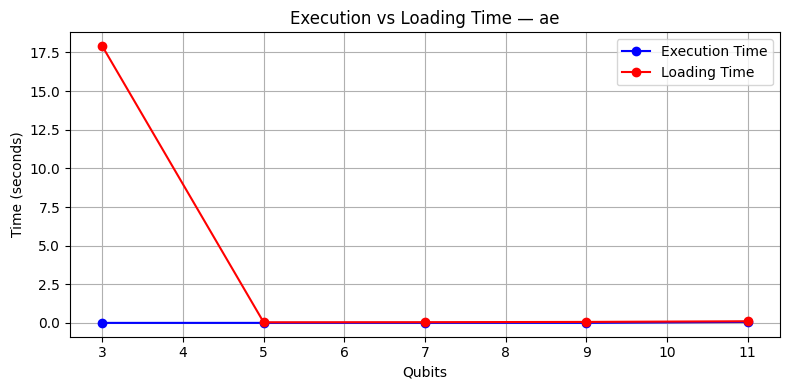

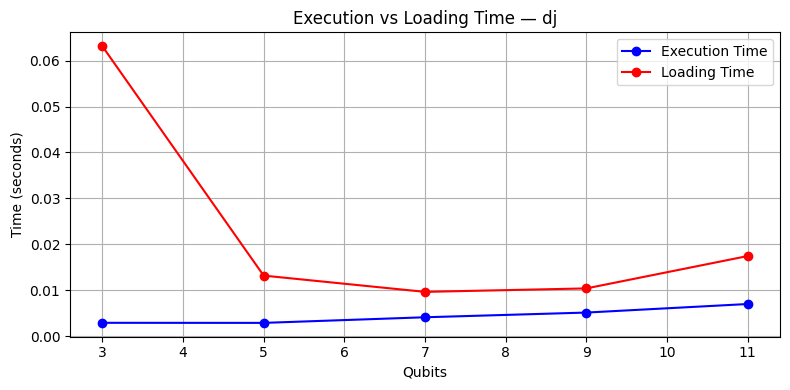

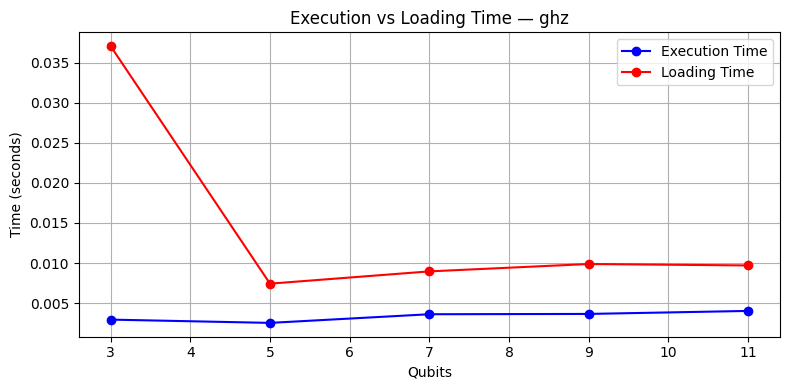

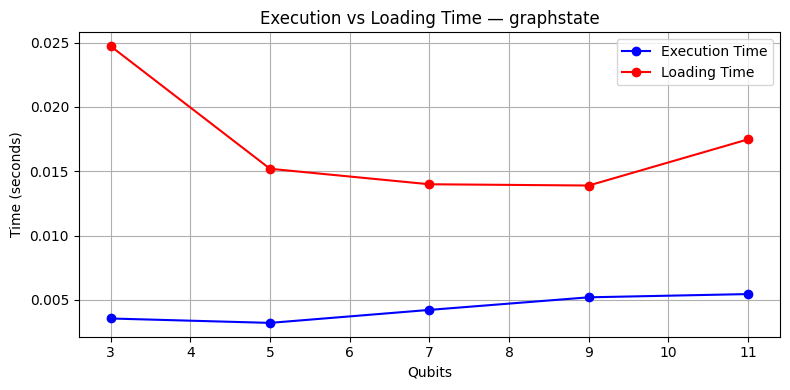

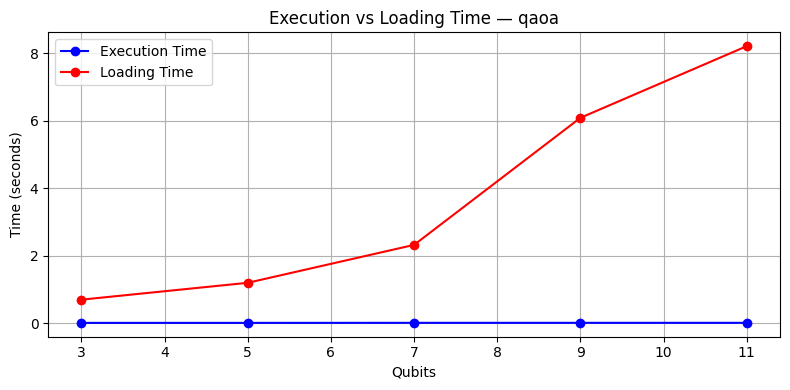

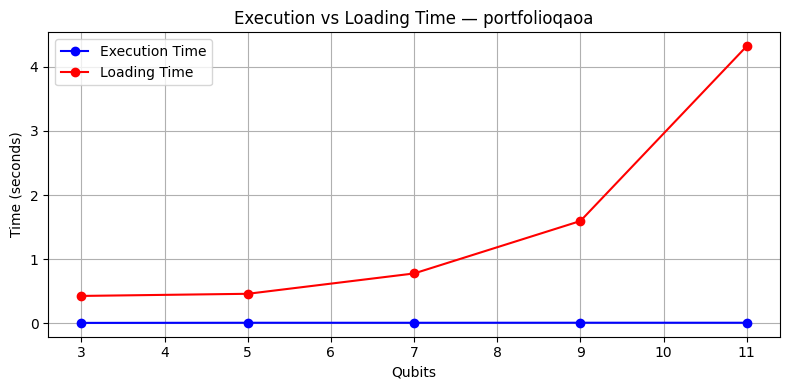

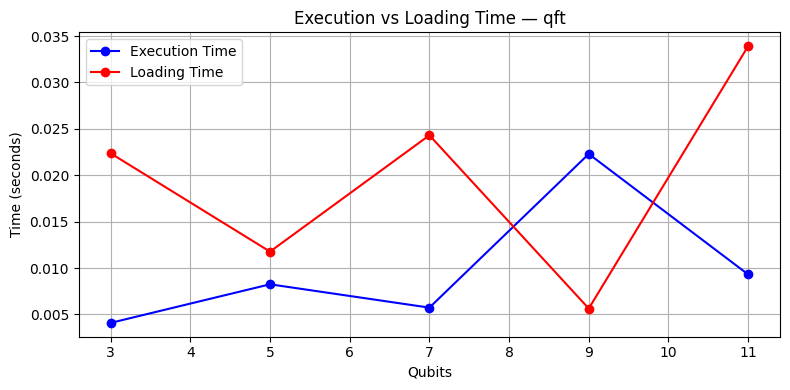

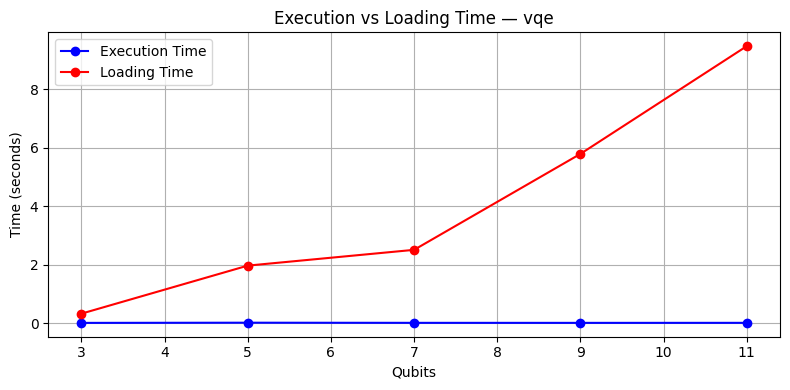

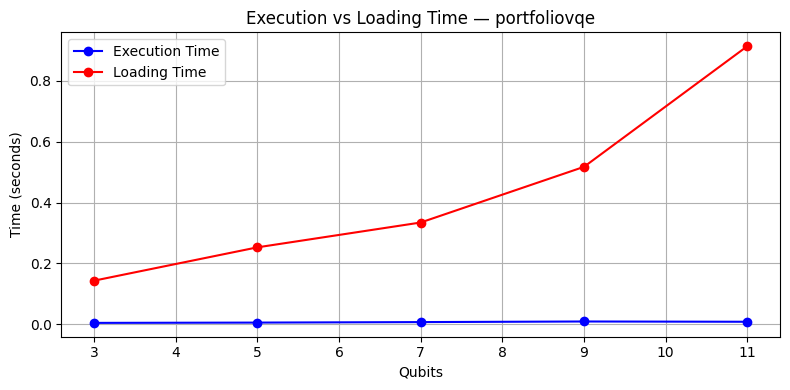

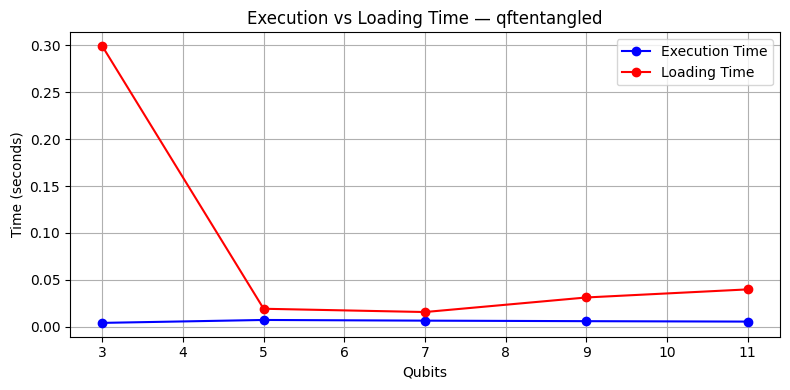

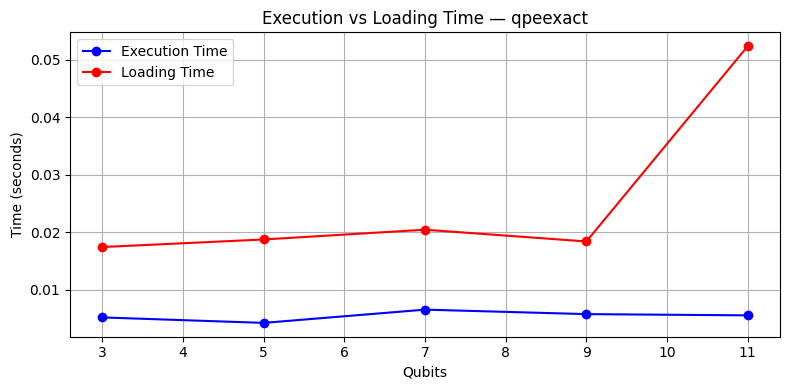

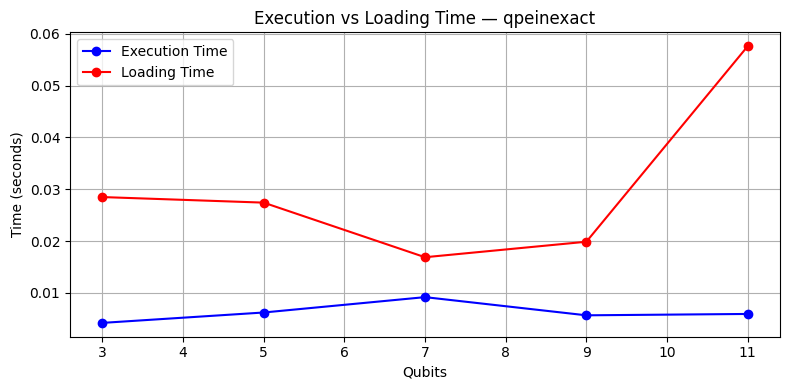

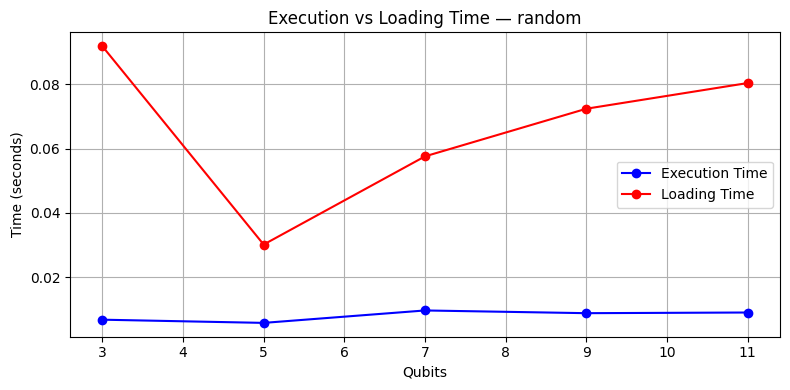

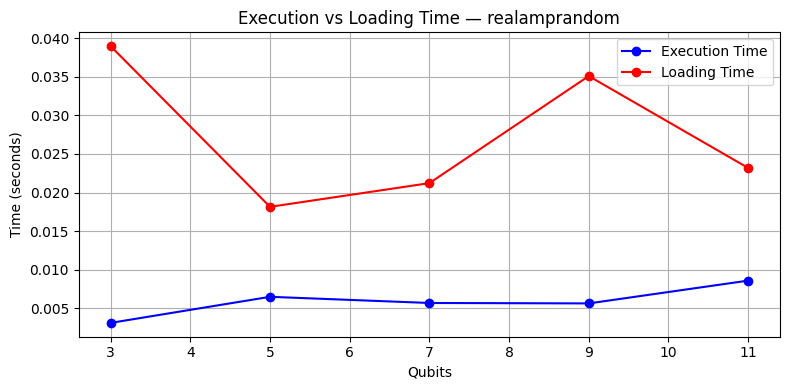

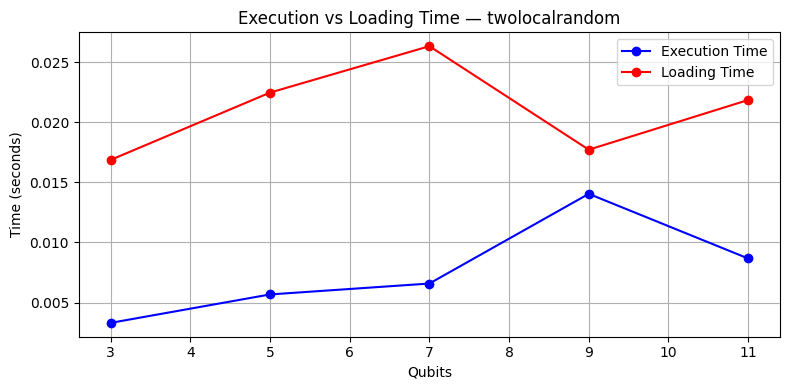

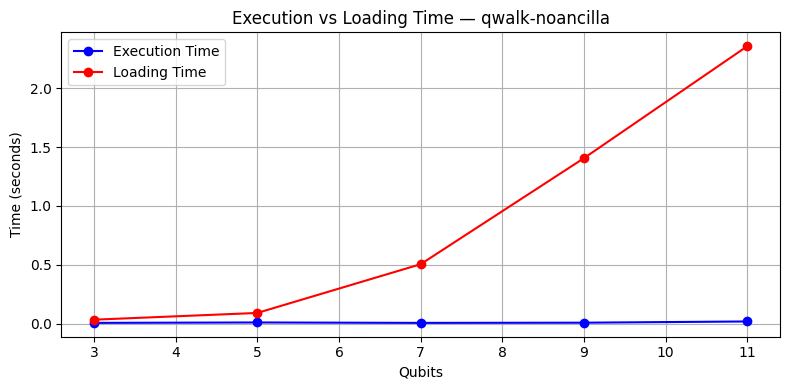

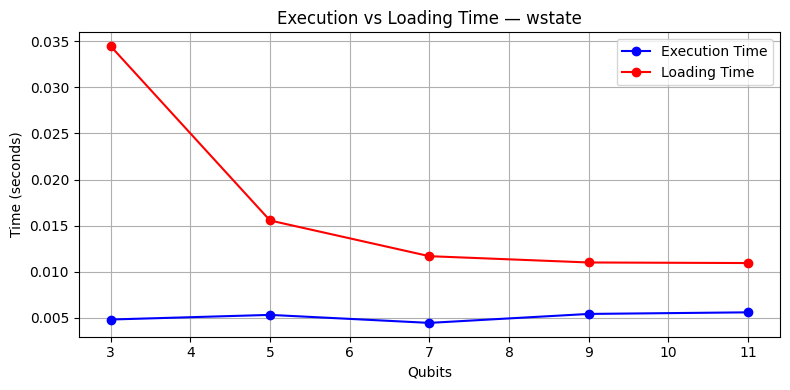

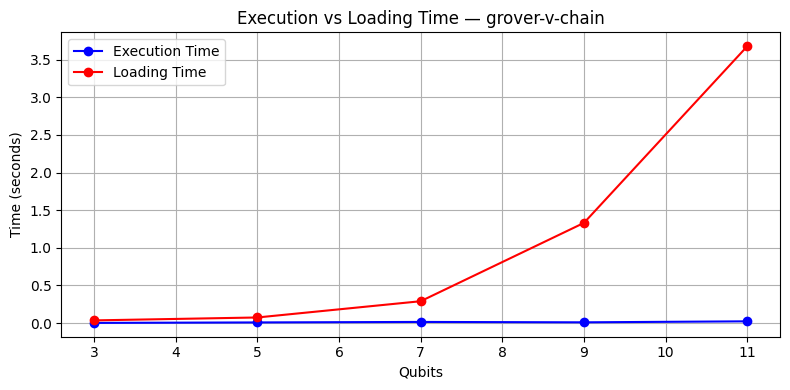

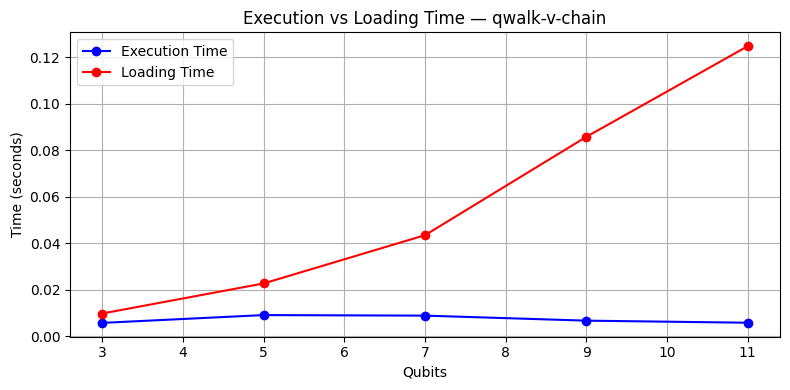

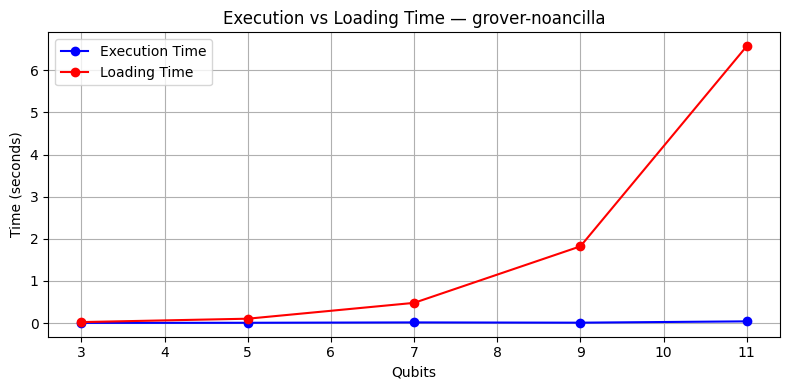

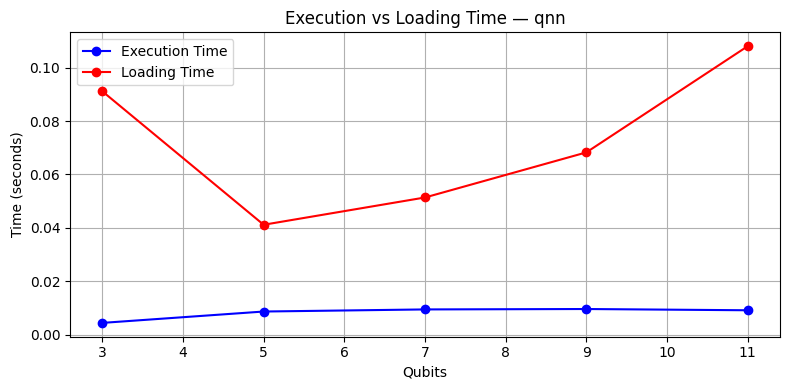

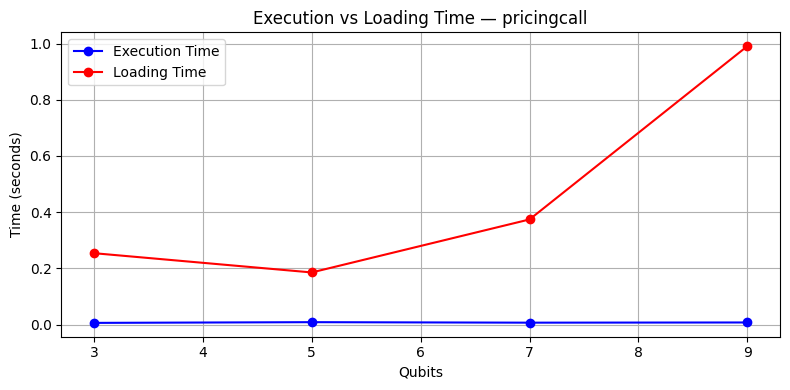

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("mqt_all_3to12_exec_time_and_algo_time.csv")

algo_dict = {}

for _, row in df.iterrows():
    algo = row["Algorithm"]
    qubits = row["QubitNumber"]
    exec_time = row["ExecutionTime"]
    load_time = row["LoadingTime"]

    if algo not in algo_dict:
        algo_dict[algo] = {"qubits": [], "exec": [], "load": []}
    algo_dict[algo]["qubits"].append(qubits)
    algo_dict[algo]["exec"].append(exec_time)
    algo_dict[algo]["load"].append(load_time)

# Plot one graph per algorithm: execution vs loading time
for algo in algo_dict:
    plt.figure(figsize=(8, 4))
    plt.plot(
        algo_dict[algo]["qubits"],
        algo_dict[algo]["exec"],
        marker="o",
        color="blue",
        label="Execution Time",
    )
    plt.plot(
        algo_dict[algo]["qubits"],
        algo_dict[algo]["load"],
        marker="o",
        color="red",
        label="Loading Time",
    )
    plt.xlabel("Qubits")
    plt.ylabel("Time (seconds)")
    plt.title(f"Execution vs Loading Time — {algo}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


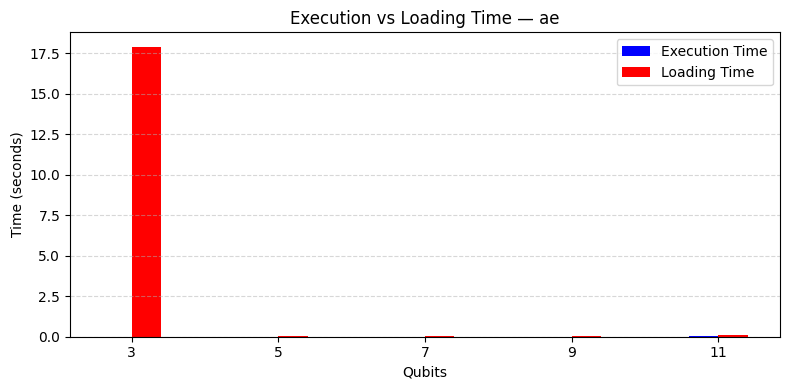

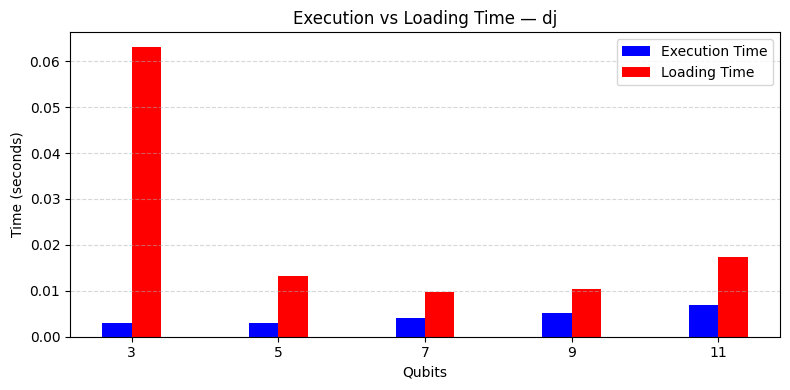

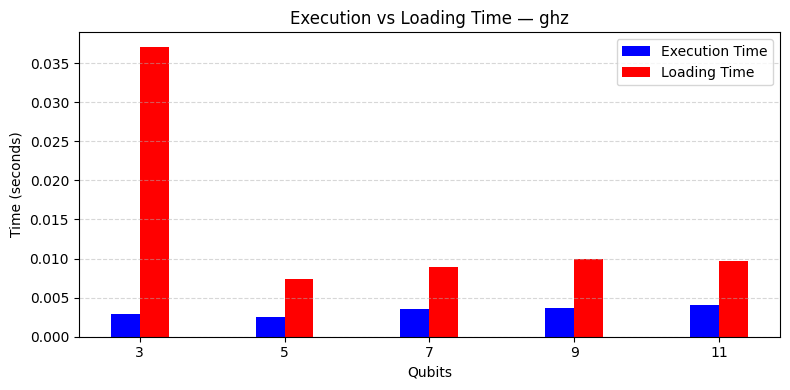

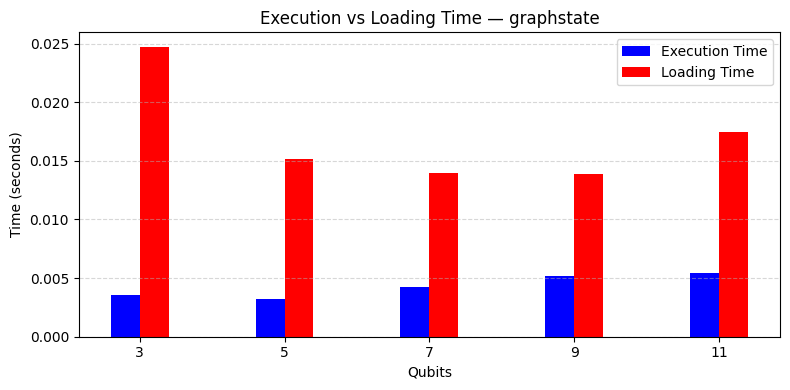

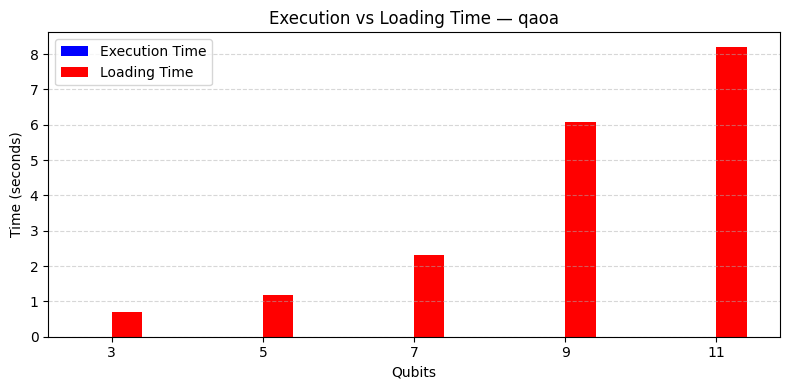

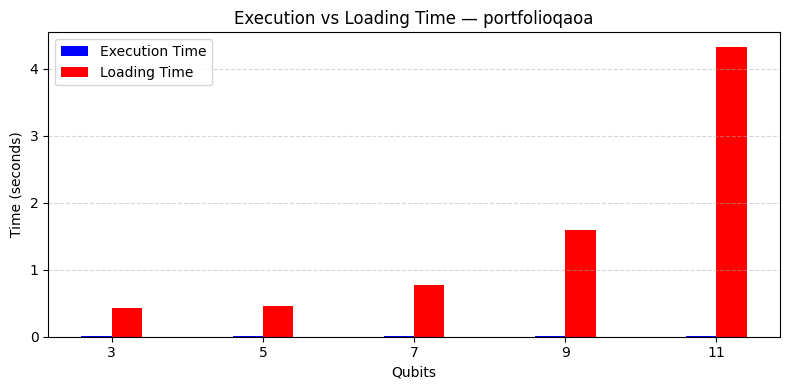

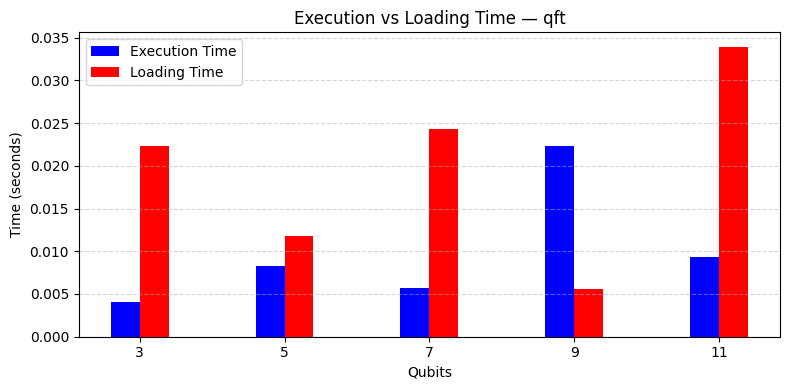

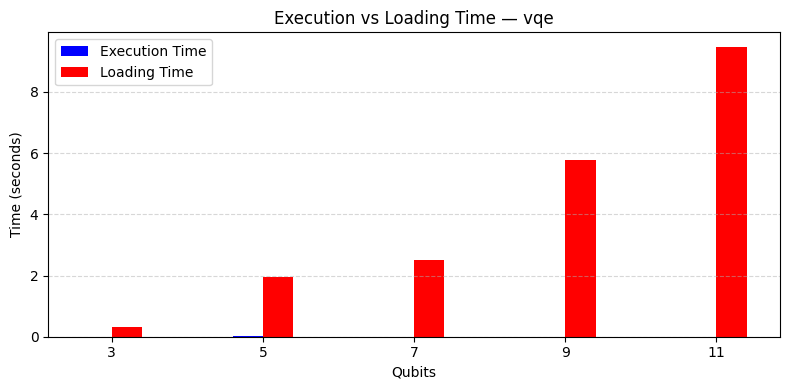

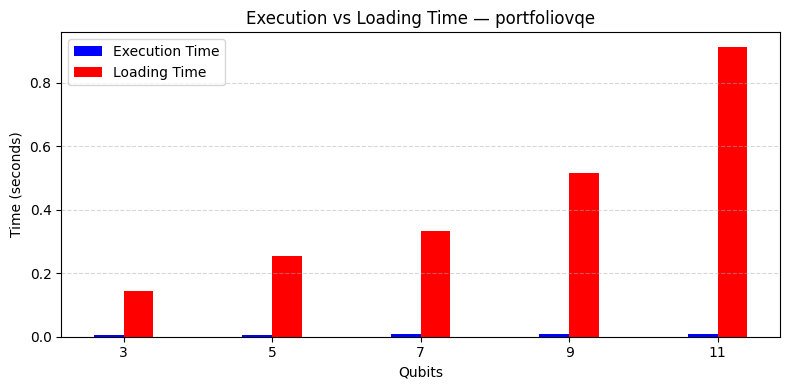

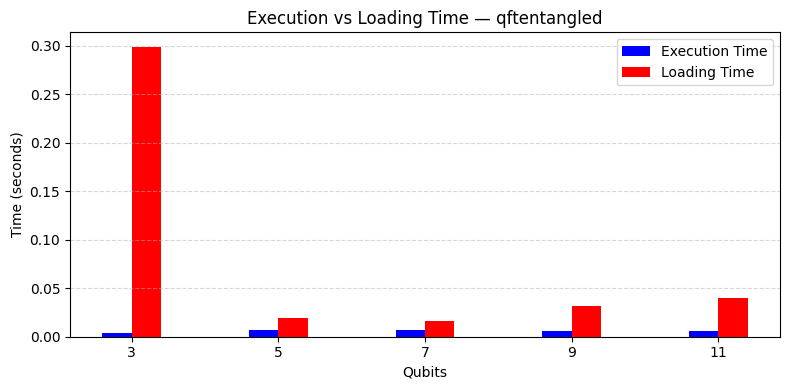

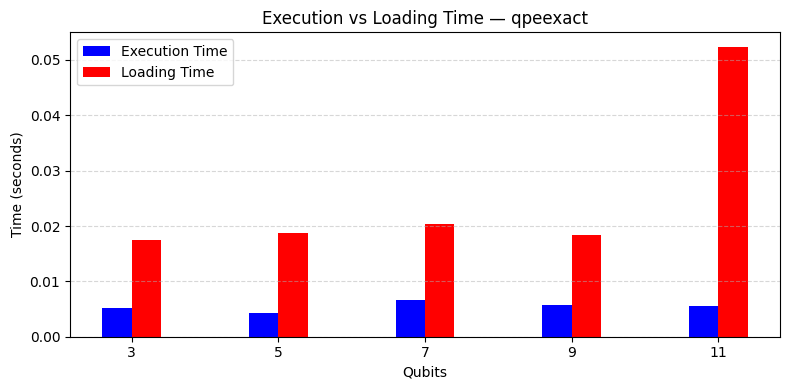

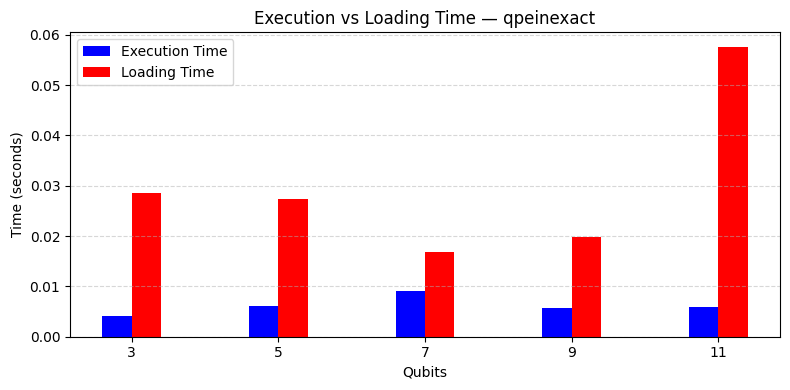

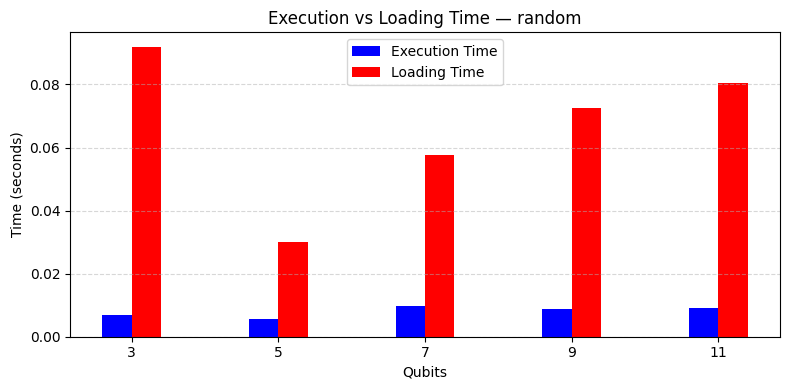

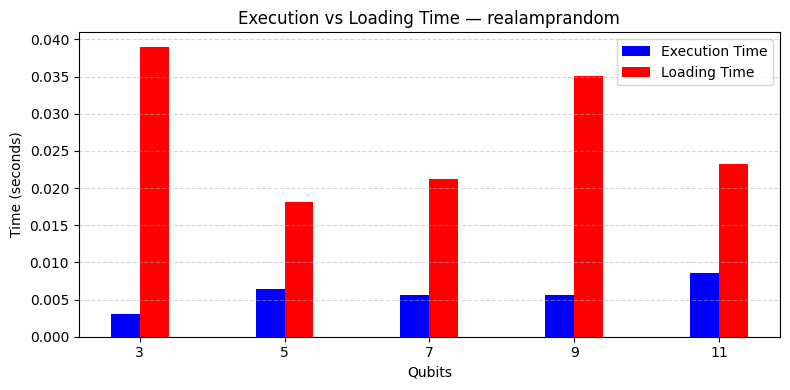

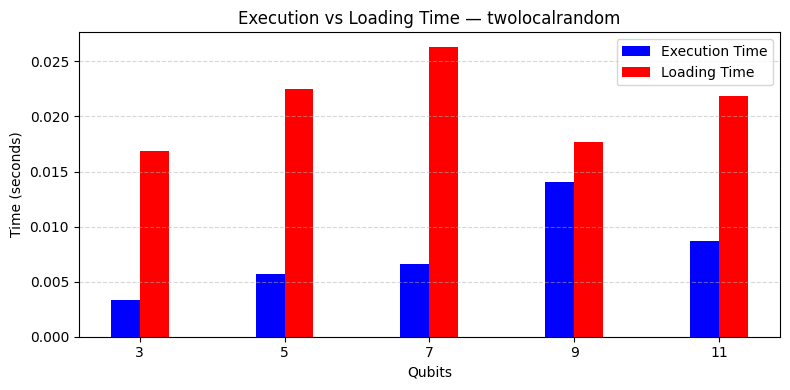

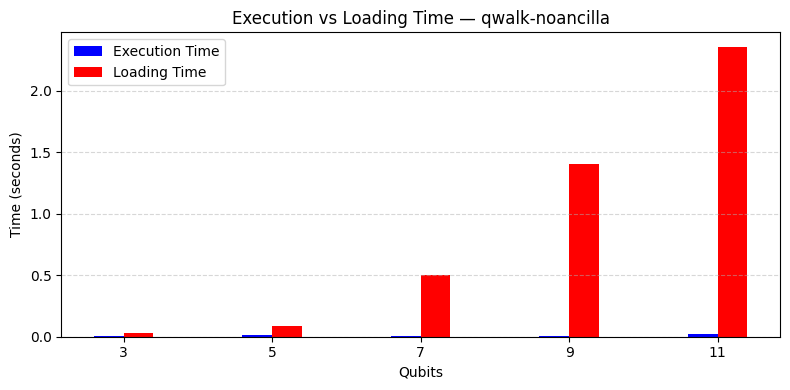

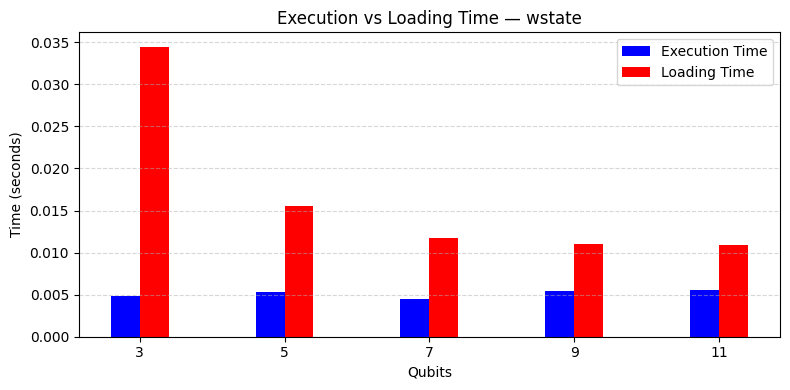

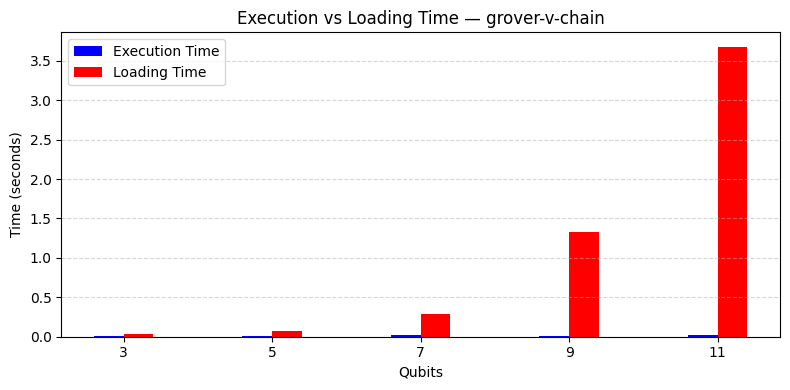

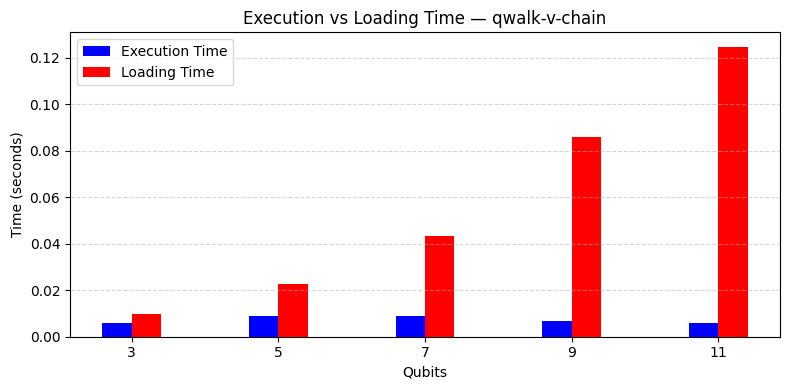

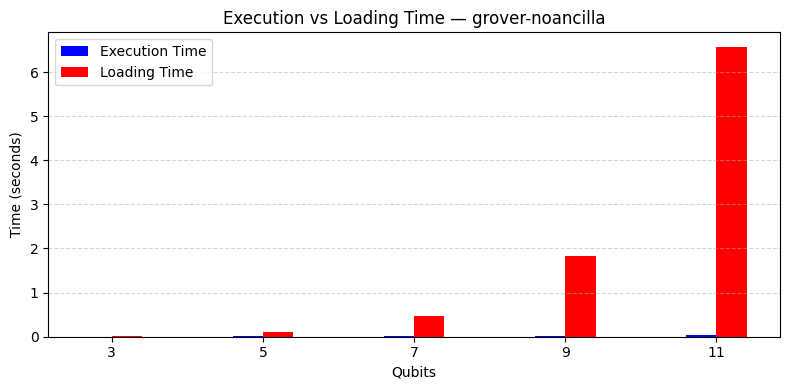

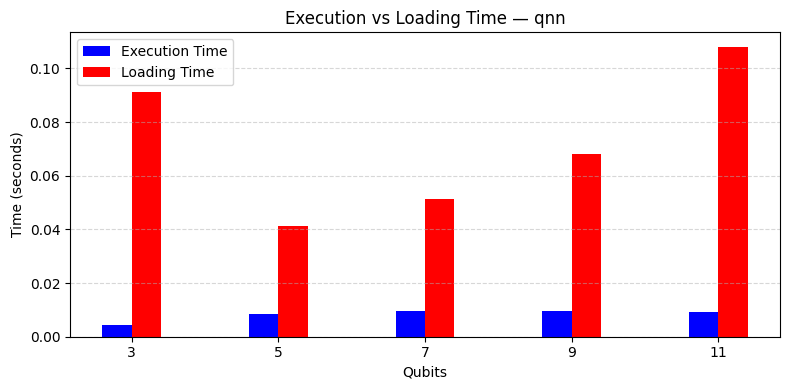

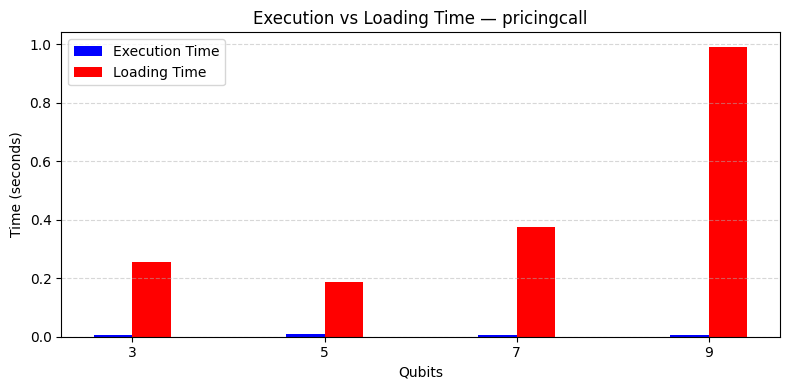

In [6]:
# Bar plot per algorithm
for algo in algo_dict:
    qubits = algo_dict[algo]["qubits"]
    exec_times = algo_dict[algo]["exec"]
    load_times = algo_dict[algo]["load"]

    x = np.arange(len(qubits))
    width = 0.2  # bar width

    plt.figure(figsize=(8, 4))
    plt.bar(x - width/2, exec_times, width, label="Execution Time", color="blue")
    plt.bar(x + width/2, load_times, width, label="Loading Time", color="red")

    plt.xticks(x, qubits)
    plt.xlabel("Qubits")
    plt.ylabel("Time (seconds)")
    plt.title(f"Execution vs Loading Time — {algo}")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()